In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
import pylab
import warnings
warnings.simplefilter("ignore")

In [2]:
credit = pd.read_csv("creditcard.csv")

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

**The value of amount after the interquartile range is very large and the mean is nearer to interquartile range hinting at the presence of outliers**

In [8]:
credit["Amount"].quantile(q=.95)

365.0

**checking the 95 percentile of data we still see a large difference with max**

In [9]:
#filter the data with 99 percentile
credit_no_outliers = credit[credit["Amount"]<1000]
credit_no_outliers.shape

(281738, 31)

In [10]:
credit_no_outliers["Class"].value_counts()

0    281255
1       483
Name: Class, dtype: int64

In [11]:
credit.shape

(284807, 31)

**we were able to preserve a large portion of data removing the outliers and preserve the fradulent class**

In [12]:
#credit_only_outliers = credit[credit["Amount"]>]
#credit_only_outliers.head()
#sns.displot(x="Amount",data= credit_no_outliers)
#sns.kdeplot(x="Amount",data= credit_no_outliers)
#sm.qqplot(credit_no_outliers["Amount"],line="45")
#credit_no_outliers["Amount_log"] = np.log(credit_no_outliers["Amount"])
#credit_no_outliers['Amount_re']=1/credit_no_outliers.Amount
#sns.kdeplot(credit_no_outliers["Amount_log"])
#sm.qqplot(credit_no_outliers["Amount_log"],line="45")
#sns.kdeplot(credit_no_outliers["Amount_re"])
 #sm.qqplot(credit_no_outliers["Amount_re"],line="45")
#sm.qqplot(boxcox1p(credit_no_outliers["Amount"],0),line="45")

<AxesSubplot:xlabel='Amount', ylabel='Density'>

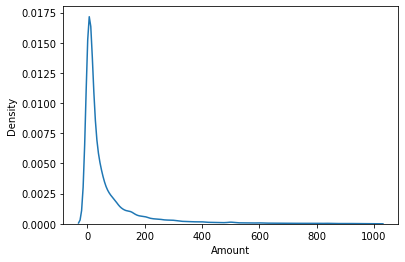

In [13]:
sns.kdeplot(credit_no_outliers["Amount"])

**the distribution is right-tailed**

<AxesSubplot:xlabel='Amount', ylabel='Density'>

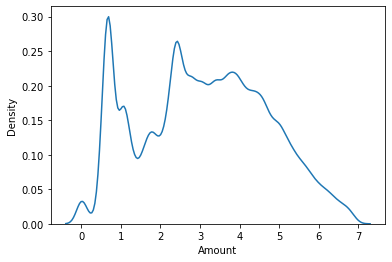

In [14]:
from scipy.special import boxcox1p
sns.kdeplot(boxcox1p(credit_no_outliers["Amount"],0))

In [15]:
credit_no_outliers["Amount_log"] = boxcox1p(credit_no_outliers["Amount"],0)

In [16]:
credit_no_outliers["Amount_log"].skew()

0.0630516271497638

In [17]:
#fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,)
#sns.scatterplot(x="Amount",data=credit_no_outliers)

In [18]:
credit_no_outliers['Class'].unique()

array([0, 1], dtype=int64)

**The class column in the dataframe indicates whether a fradulent transaction occured**
- **class '0' - not fraudulent**
- **class '1' - fraudulent**

In [19]:
credit_no_outliers['Class'].value_counts()

0    281255
1       483
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Amount'>

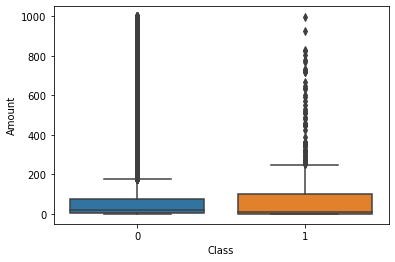

In [20]:
sns.boxplot(data=credit_no_outliers,x= "Class",y="Amount")

In [21]:
target= credit_no_outliers['Class']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
features= credit_no_outliers.drop(['Class','Amount'],axis=1)
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


In [23]:
#features.corr()

In [24]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test =tts(features,target,test_size=.20,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s =scale.transform(X_test)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=.9)
X_train_t = pca.fit_transform(X_train_s)
X_test_t =pca.transform(X_test_s)

In [29]:
pca.explained_variance_ratio_

array([0.05795462, 0.05204212, 0.04159561, 0.04045938, 0.03864956,
       0.03730931, 0.03638632, 0.0358256 , 0.0346897 , 0.0342907 ,
       0.03411182, 0.03401245, 0.03383947, 0.03368007, 0.03364643,
       0.03361072, 0.03353788, 0.0334554 , 0.03339147, 0.03334526,
       0.03331049, 0.03327124, 0.03310316, 0.03306536, 0.03066629])

In [30]:
len(pca.explained_variance_ratio_)

25

In [31]:
#X_train.corr().abs()
# c =X_train.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending =False)
# count =0
# for i in range(len(so.values)):
#     if so.values[i]< 1 and so.values[i]>=0.3:
#         count = count+1
# print(count)

# from sklearn.decomposition import FactorAnalysis
# fa = FactorAnalysis(n_components=26)
# X_train_t = fa.fit_transform(X_train)
# X_test_t = fa.fit_transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve,auc,confusion_matrix



In [33]:
# def model_compute(model,X_train,X_test,y_train,y_test):
#     model.fit(X_train,y_train)
#     predict_train = model.predict(X_train)
#     ptrain_score = precision_score(y_train,predict_train)
#     atrain_score = accuracy_score(y_train,predict_train)
#     rtrain_score = recall_score(y_train,predict_train)

#     #print("the precision score on train data",train_score)

#     predict_test = model.predict(X_test_t)
#     ptest_score = precision_score(y_test,predict_test)
#     atest_score = precision_score(y_test,predict_test)
#     rtest_score = recall_score(y_test,predict_test)


#     #print("the precision score on train data",test_score)
#     return ptrain_score,atrain_score,rtrain_score,ptest_score,atest_score,rtest_score


## *LOGISTIC REGRESSION* ##

In [34]:
model_log = LogisticRegression()

In [35]:
#p1,a1,r1,p2,a2,r2 = model_compute(model_log,X_train_t,X_test_t,y_train,y_test)

In [36]:
model_log.fit(X= X_train_t,y= y_train)

LogisticRegression()

In [37]:
predict_train = model_log.predict(X_train_t)
train_score = precision_score(y_train,predict_train)
acc_score = accuracy_score(y_train,predict_train)
re_score = accuracy_score(y_train,predict_train)
print("the precision score on train data:",train_score)
print("the accuracyscore on train data  :",acc_score)
print("the recall score on train data   :",re_score)

the precision score on train data: 0.8851851851851852
the accuracyscore on train data  : 0.9992146945294822
the recall score on train data   : 0.9992146945294822


In [38]:
predict_test = model_log.predict(X_test_t)
test_score = precision_score(y_test,predict_test)
acctscore= accuracy_score(y_test,predict_test)
rec = recall_score(y_test,predict_test)
print("the precision score on test data:",test_score)
print("the accuracy score on test data :",acctscore)
print("the recall score on test data   :",rec)


the precision score on test data: 0.855072463768116
the accuracy score on test data : 0.9991304039185064
the recall score on test data   : 0.6020408163265306


In [39]:
predict_prob =model_log.predict_proba(X_test_t)
#predict_prob

In [40]:
fpr,tpr,threshold = roc_curve(y_test,predict_prob[:,1])

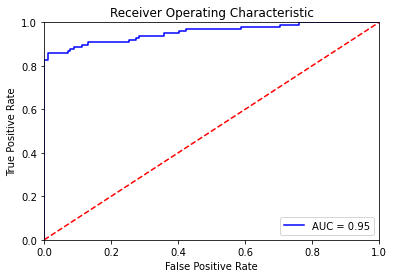

In [41]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
confusion_matrix(y_test,predict_test)

array([[56240,    10],
       [   39,    59]], dtype=int64)

## SVM

In [43]:
parameter_grid = {
    'kernel' : ['linear', 'rbf', 'sigmoid' ],
    'C':[1,5,10,15]
}

In [44]:
model_svm = SVC(kernel="poly",degree=3,C=5,coef0=1,probability=True)

In [45]:
model_svm.fit(X_train_t,y_train)


SVC(C=5, coef0=1, kernel='poly', probability=True)

In [46]:
#gridsrc = GridSearchCV(estimator=model_svm,param_grid=parameter_grid,scoring='precision')

In [47]:
#gridsrc.fit(X_train_t,y_train)

In [48]:
#gridsrc.best_params_

In [49]:
predict_train = model_svm.predict(X_train_t)
train_score = precision_score(y_train,predict_train)
acc_score = accuracy_score(y_train,predict_train)
re_score = accuracy_score(y_train,predict_train)
print("the precision score on train data:",train_score)
print("the accuracyscore on train data  :",acc_score)
print("the recall score on train data   :",re_score)

the precision score on train data: 1.0
the accuracyscore on train data  : 0.9998935179023026
the recall score on train data   : 0.9998935179023026


In [50]:
predict_test = model_svm.predict(X_test_t)
test_score = precision_score(y_test,predict_test)
acctscore= accuracy_score(y_test,predict_test)
rec = recall_score(y_test,predict_test)
print("the precision score on test data:",test_score)
print("the accuracy score on test data :",acctscore)
print("the recall score on test data   :",rec)


the precision score on test data: 0.9605263157894737
the accuracy score on test data : 0.9995030879534322
the recall score on test data   : 0.7448979591836735


In [51]:
svmpredict_prob = model_svm.predict_proba(X_test_t)
fpr, tpr, threshold = roc_curve(y_test, svmpredict_prob[:,1])

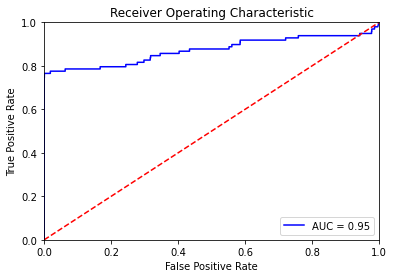

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
confusion_matrix(y_test,predict_test)

array([[56247,     3],
       [   25,    73]], dtype=int64)

## Decision Tree ##

In [54]:
parameter_grid = {
    "max_depth":[3,4,5,6,7,8,9],
    "criterion":["gini","entropy"]
}

In [55]:
model_dt = DecisionTreeClassifier(max_depth=7)

In [56]:
model_dt.fit(X_train_t,y_train)

DecisionTreeClassifier(max_depth=7)

In [57]:
grdsrcdt = GridSearchCV(estimator=model_dt,param_grid=parameter_grid,scoring="precision",n_jobs=-1)

In [58]:
grdsrcdt.fit(X_train_t,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring='precision')

In [59]:
grdsrcdt.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [60]:
model_dt = DecisionTreeClassifier(max_depth=5,criterion="entropy")

In [61]:
model_dt.fit(X_train_t,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [62]:
predict_train = model_dt.predict(X_train_t)
train_score = recall_score(y_train,predict_train)
print("the recall score on train data",train_score)

the recall score on train data 0.8337662337662337


In [63]:
predict_test = model_dt.predict(X_test_t)
test_score = recall_score(y_test,predict_test)
print("the recall score on test data",test_score)

the recall score on test data 0.7959183673469388


In [64]:
confusion_matrix(y_test,predict_test)

array([[56239,    11],
       [   20,    78]], dtype=int64)

## Gradient boosting and XGBM ##

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
grdclf = GradientBoostingClassifier()

In [69]:
grdclf.fit(X_train_t,y_train)

GradientBoostingClassifier()

In [70]:
predictgb_train = grdclf.predict(X_train_t)
traingb_score = recall_score(y_train,predictgb_train)
print("the recall score on train data",traingb_score)

the recall score on train data 0.7480519480519481


In [71]:
predictgb_test = grdclf.predict(X_test_t)
testgb_score = recall_score(y_test,predictgb_test)
print("the recall score on test data",testgb_score)

the recall score on test data 0.7142857142857143


In [72]:
confusion_matrix(y_test,predictgb_test)

array([[56235,    15],
       [   28,    70]], dtype=int64)

### XGBM ###

In [73]:
parameter_grid = {
     "max_depth":[3,4,5,6,7,8,9],
     "n_estimators":[200,500,1000,2000,3000],
      }

In [74]:
from xgboost import XGBClassifier

In [75]:
xgbclf = XGBClassifier(n_jobs=-1,max_depth=5,n_estimators=3000)

In [76]:
xgbclf.fit(X_train_t,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=3000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [77]:
#grdsrcxgb = GridSearchCV(estimator=xgbclf,param_grid=parameter_grid,scoring="precision",n_jobs=-1,verbose=1)
#grdsrcxgb.fit(X_train_t,y_train)

In [78]:
#grdsrcxgb.best_params_

In [79]:
testpredict=xgbclf.predict(X_test_t)

In [80]:
testpredict_score = recall_score(y_test,testpredict)
print("the recall score on test data",testpredict_score)

the recall score on test data 0.8061224489795918


In [83]:
confusion_matrix(y_test,testpredict)

array([[56243,     7],
       [   19,    79]], dtype=int64)

## Random forest ##

In [85]:
from sklearn.ensemble import RandomForestClassifier


In [86]:
model_rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model_rnd.fit(X_train_t, y_train)
y_pred_rf = model_rnd.predict(X_test_t)
testrf_score = recall_score(y_test,y_pred_rf)
print("the recall score on test data",testrf_score)

the recall score on test data 0.7448979591836735


In [87]:
confusion_matrix(y_test,y_pred_rf)

array([[56243,     7],
       [   25,    73]], dtype=int64)

## VOTING CLASSIFIER ##

In [88]:
from sklearn.ensemble import VotingClassifier

In [89]:
voting_clf= VotingClassifier(estimators=[('lr', model_log), ('dt', model_dt), ('svc', model_svm)],voting='hard')

In [90]:
voting_clf.fit(X_train_t,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5)),
                             ('svc',
                              SVC(C=5, coef0=1, kernel='poly',
                                  probability=True))])

In [91]:
predictvc_test = voting_clf.predict(X_test_t)
testvc_score = recall_score(y_test,predictvc_test)
print("the recall score on test data",testvc_score)

the recall score on test data 0.7857142857142857


In [92]:
confusion_matrix(y_test,predictvc_test)

array([[56244,     6],
       [   21,    77]], dtype=int64)

## *ADA BOOST* ##

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_t, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [97]:
predictada_test = ada_clf.predict(X_test_t)
testada_score = recall_score(y_test,predictada_test)
print("the recall score on test data",testada_score)

the recall score on test data 0.7653061224489796


In [98]:
confusion_matrix(y_test,predictada_test)

array([[56240,    10],
       [   23,    75]], dtype=int64)

***XGBM IS THE BETTER THE MODEL AS IT GIVES 80% RECALL WHICH IS HIGHER COMPARED TO OTHER MODEL***